# <center>Traffic Sign Detection through Image Classification</center>

## Group Member's Name:

- Aniketh Vaglapuram C0903304
- Ashlee 
- Dev Parmar C0908036
- Guruprasad Tandlekar C0902813
- Siddharth Yadav C0907985
- Yogita Sharma

## Project Overview
In this project, we aim to develop a robust image classification system for detecting traffic signs. Leveraging machine learning techniques, particularly deep learning algorithms, we seek to accurately classify various types of traffic signs commonly found on roads. The ultimate goal is to enhance road safety by enabling automated detection and recognition of traffic signs in real-time.

## Dataset Overview
- **Total number of classes:** 43
- **Total number of images in the dataset:** 34,799

In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import  cv2
import pickle
import os
import pandas as pd
import random
import warnings

In [2]:
warnings.filterwarnings('ignore')

- **path**: Stores the directory path where the dataset is located.
  
- **labelFile**: Holds the filename of the CSV file containing labels for the dataset.
  
- **batch_size_val**: Determines the number of samples in each batch during training. A batch size of 32 means each iteration during training will process 32 samples.
  
- **epochs_val**: Represents the number of times the entire dataset will be passed forward and backward through the neural network during training.
  
- **imageDimesions**: Defines the dimensions of the input images, specifying width, height, and the number of color channels (in this case, 3 for RGB images).
  
- **testRatio**: Determines the ratio of the dataset to be allocated for testing. Here, 30% of the dataset will be used for testing.
  
- **validationRatio**: This variable seems to have been intended to represent the ratio for splitting the training set into training and validation sets, but it's marked with a comment indicating it's not valid. If you intended to specify the validation split, you may want to adjust this line accordingly or remove the comment.

In [3]:
# defining the path for dataset
path = "data" 
labelFile = 'labels.csv' 
batch_size_val=32 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.30    
validationRatio = 0.30

## Preprocessing

This section of code is responsible for importing and preprocessing the dataset.

- **Initialize variables**: Variables like `count`, `images`, and `classNo` are initialized to keep track of the number of classes and their respective images.

- **Get list of directories**: The code retrieves a list of directories within the specified path, each directory representing a class of images.

- **Loop through each class directory**: It iterates over each class directory, reading each image within the directory using OpenCV (`cv2.imread()`).

- **Append image and class label**: For each image, it appends the image itself and its corresponding class label to the `images` and `classNo` lists, respectively.

- **Print progress**: During the loop, it prints the current class count to track progress.

- **Completion message**: Finally, it prints a message indicating that the process of importing classes is complete.


In [4]:
# preprocessing
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")

for x in range (0,len(myList)):
    
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    if count==noOfClasses-1:
        print(count)
        break
    print(count, end ="->")
    count +=1

print("Done Importing classes")

Total Classes Detected: 43
Importing Classes.....
0->1->2->3->4->5->6->7->8->9->10->11->12->13->14->15->16->17->18->19->20->21->22->23->24->25->26->27->28->29->30->31->32->33->34->35->36->37->38->39->40->41->42
Done Importing classes


# Converting Images and ClassNo TO Numpy Arrays

In [5]:
images = np.array(images)
classNo = np.array(classNo)

# Exploratory Data Analysis

In [6]:
# summary of the Dataset
num_classes = len(np.unique(classNo))
print("Total number of classes:", num_classes)

dataset_size = len(images)
print("Total number of images in the dataset:", dataset_size)

Total number of classes: 43
Total number of images in the dataset: 34799


In [7]:
# shuffle the Images 
shuffle_indices = np.random.permutation(dataset_size)
shuffled_images = images[shuffle_indices]
shuffled_labels = classNo[shuffle_indices]

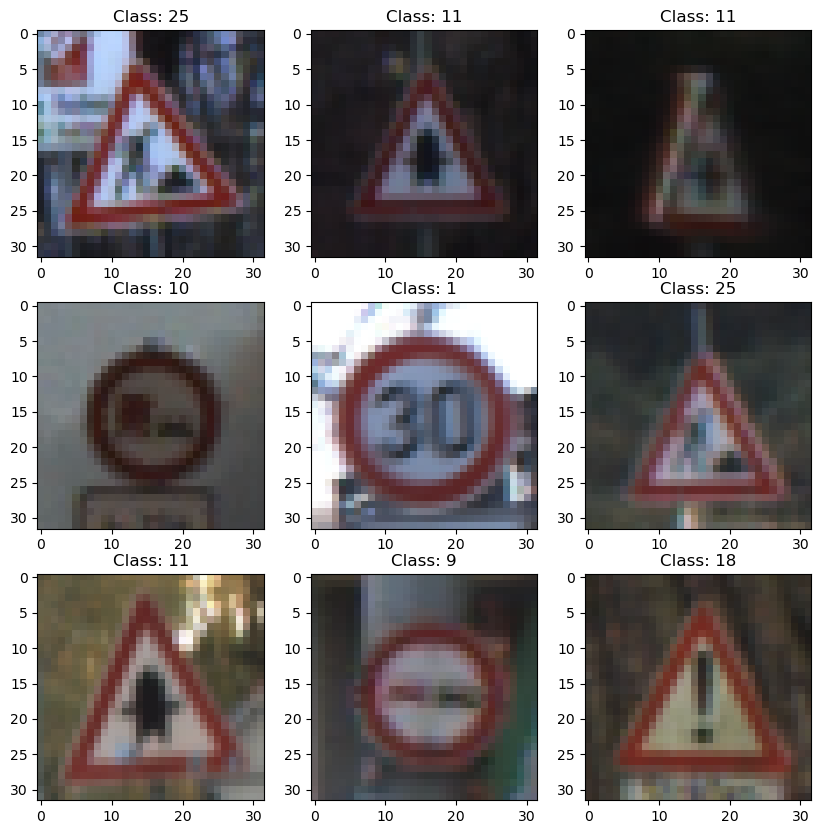

In [8]:
# Visualizing the Images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(shuffled_images[i])
    ax.set_title("Class: " + str(shuffled_labels[i]))
plt.show()

# Class Distribution

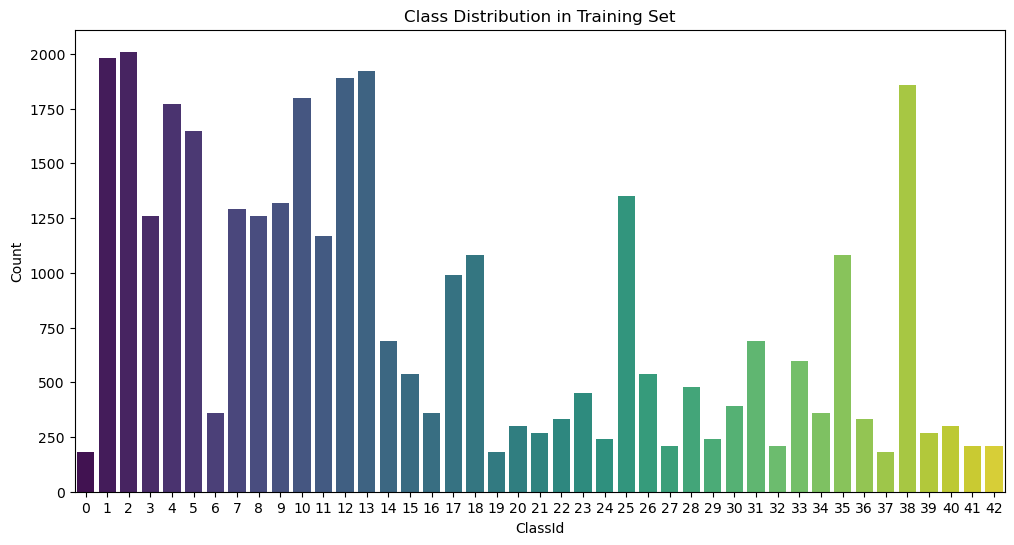

In [9]:
class_counts = np.bincount(classNo)
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")
plt.xlabel('ClassId')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.show()

In [10]:
# Getting Pixel instensity of the Images
mean_pixel_intensity = np.mean(images)
std_pixel_intensity = np.std(images)
print("Mean pixel intensity:", mean_pixel_intensity)
print("Standard deviation of pixel intensity:", std_pixel_intensity)

Mean pixel intensity: 82.6775890369964
Standard deviation of pixel intensity: 67.85088842633249


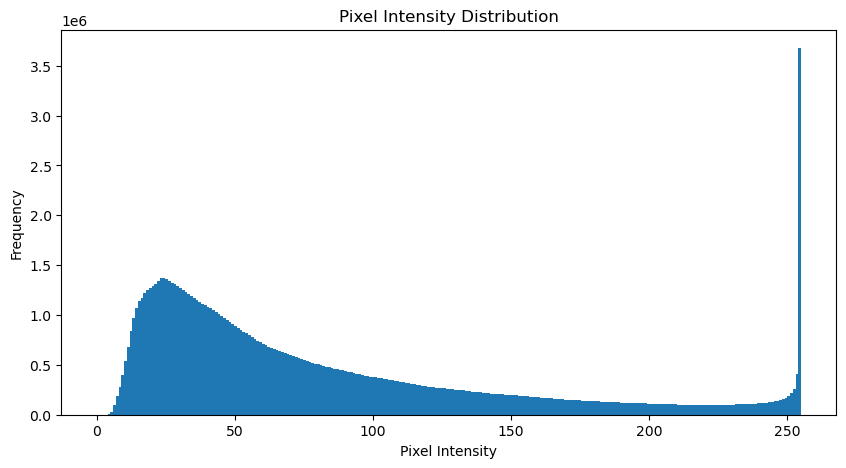

In [11]:
#pixel Intensity Distribution Plot
plt.figure(figsize=(10, 5))
plt.hist(images.ravel(), bins=256, range=(0, 255))
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [12]:
# defining the path for dataset
path = "data" 
labelFile = 'labels.csv' 
batch_size_val=32 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.30    
validationRatio = 0.30

# Train Test Validation Split
- We are spliting the Data into Train test and Validation Split here.
- we Decided to go with 70/30 split.
- 70% percent of the Data was for Training the model.
- 30% of unseen data was used for Testing purpose.
- Out of 30% percent of Testing Data 30% of Data was taken for  Validation purpose. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [14]:
# Printing the Shapes of Training , Testing and Validation Sets.
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(17051, 32, 32, 3) (17051,)
Validation(7308, 32, 32, 3) (7308,)
Test(10440, 32, 32, 3) (10440,)


In [15]:
# Loading the labels of the Data
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
 
num_of_samples = []
cols = 5
num_classes = noOfClasses

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [16]:
noOfClasses

43

In [17]:
# preprosseing the 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

In [18]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [20]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  

In [21]:
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

In [22]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)


In [23]:
def Model():
    model= Sequential()
    model.add((Conv2D(30,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(15, (3,3),activation='relu')))
    model.add((Conv2D(15, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [24]:
model = Model()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 15)        2040      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)         

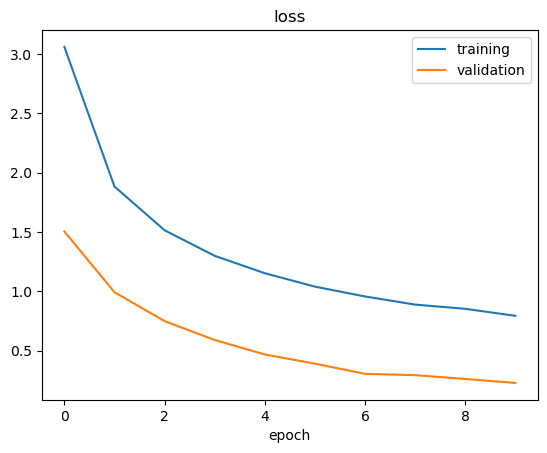

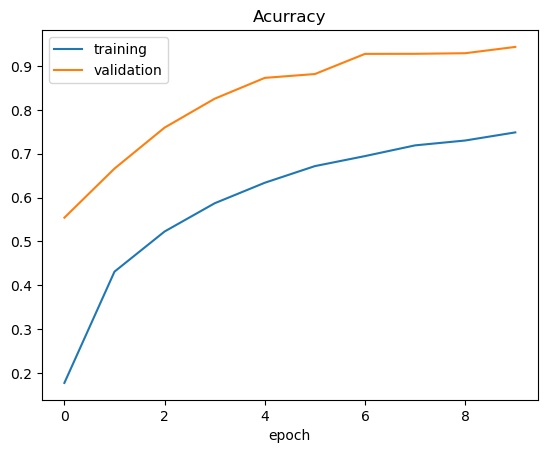

In [25]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [26]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.22465866804122925
Test Accuracy: 0.9436781406402588


In [27]:
score =model.evaluate(X_validation,y_validation,verbose=0)
print('Validation Score:',score[0])
print('Validation Accuracy:',score[1])

Validation Score: 0.22901298105716705
Validation Accuracy: 0.9437602758407593


In [28]:
score = model.evaluate(X_train,y_train,verbose=0)
print('Train Score:',score[0])
print('Train Accuracy:',score[1])

Train Score: 0.2057563066482544
Train Accuracy: 0.9518503546714783


In [38]:
model.save("trafficsignrecognition.h5")

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_pred = model.predict(X_test)
y_test_binarized = label_binarize(y_test.argmax(axis=1), classes=np.arange(num_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

327/327 [==============================] - 1s 2ms/step


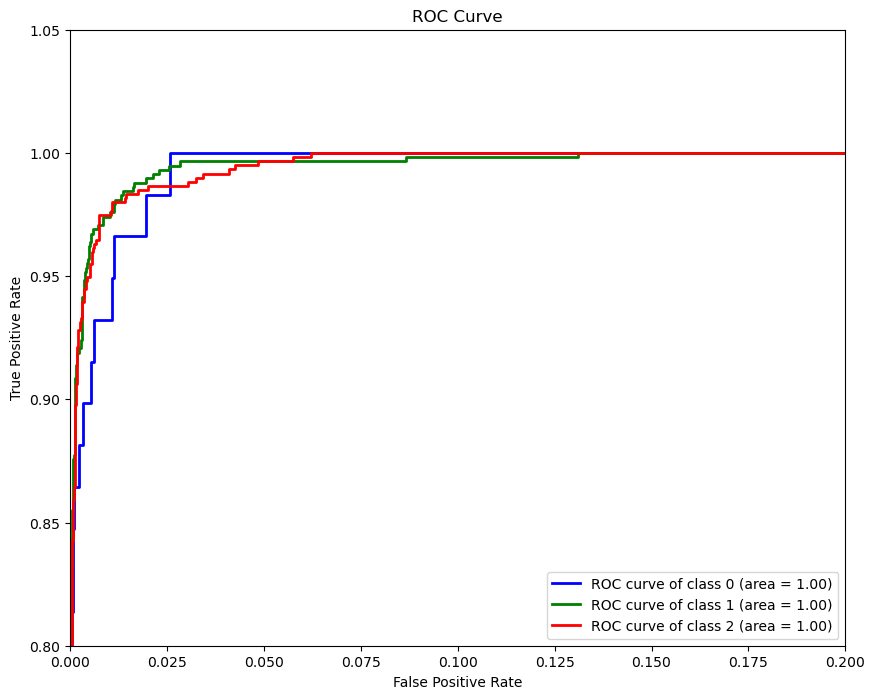

In [40]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:

y_pred = np.argmax(model.predict(X_test), axis=1)

327/327 [==============================] - 1s 2ms/step


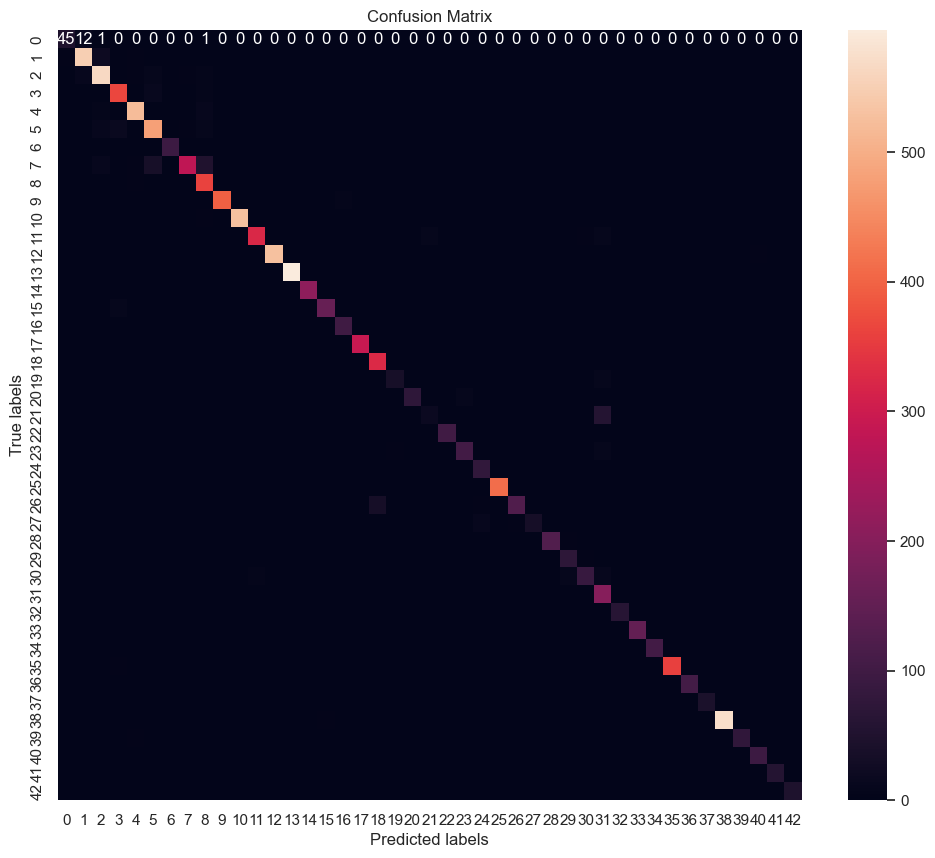

In [45]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(cm, annot=True, ax=ax);
# labels, title and ticks
+
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

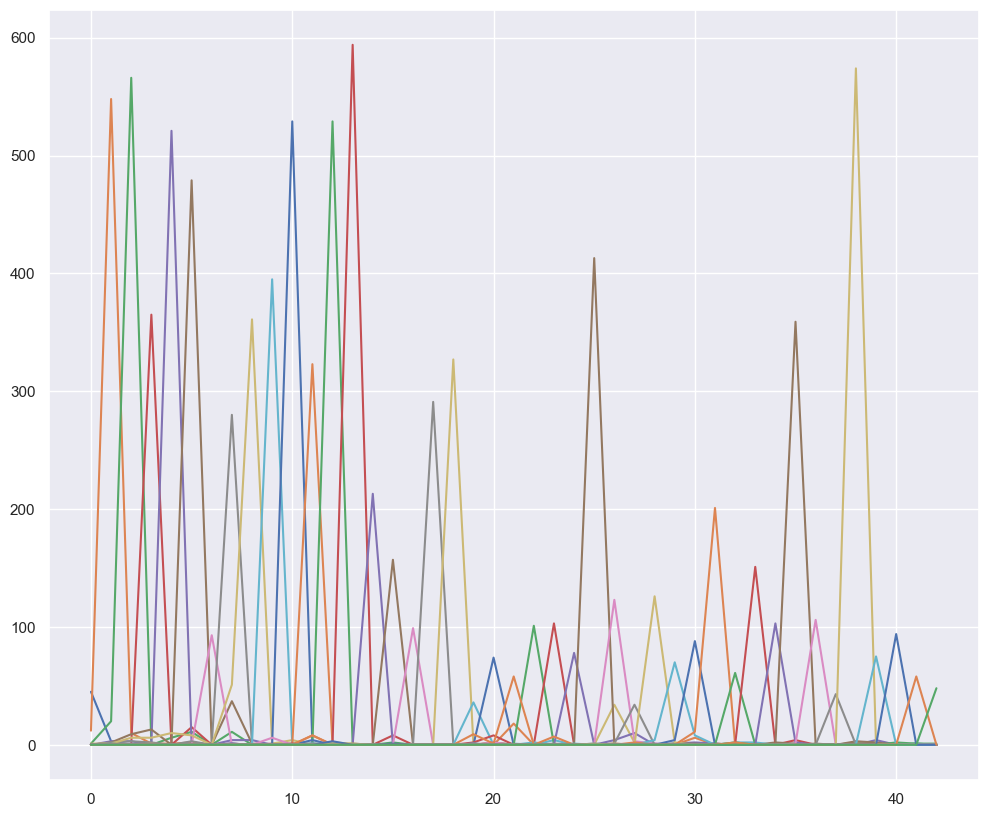

In [ ]:
""